In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import openpyxl

In [2]:
df = pd.read_csv("car_prices.csv") #codigo para ler o arquivo importado

df.info() # codigo mostrando cada coluna e o tipo da variavel

NameError: name 'pd' is not defined

In [ ]:
print(df.shape) # mostra quantidade de linhas e colunas

print(df.columns) # nome de cada coluna

print(df.isnull().sum()) #quantidade de termos nulos  em cada coluna

print(df.describe()) #uma media geral do arquivo


(558837, 16)
Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64
                year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   


In [ ]:
df_teste=df

In [ ]:
df_teste["saledate"] = pd.to_datetime(df_teste["saledate"], errors="coerce", utc=True) # linhas de codigo para mudar a formatação das datas

df_teste["saledate"] = df_teste["saledate"].dt.strftime("%d/%m/%Y") 

C:\Users\Caique\AppData\Local\Temp\ipykernel_15952\1250743305.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_teste["saledate"] = pd.to_datetime(df_teste["saledate"], errors="coerce", utc=True)


In [ ]:
df_teste.info() #antes de retirar os termos nulos:558837 entradas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558799 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
df_teste=df_teste.dropna() # linhas para retirar os temos nulos/nan

df_teste.info()#depois de retirar os termos nulos:472325 entradas

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


In [ ]:
vendas_datas=df_teste.groupby(["saledate", "make"])["make"].size() # linhas para mostrar a data de venda e quantos/quais carros foram vendidos naquela data

print(vendas_datas)

saledate    make      
01/01/2014  Acura           1
            Buick           1
            Cadillac        2
            Chevrolet       9
            Chrysler        4
                         ... 
31/12/2014  Suzuki          4
            Toyota        451
            Volkswagen    108
            Volvo          24
            smart           4
Name: make, Length: 4700, dtype: int64


In [ ]:

df_teste["saledate"] = pd.to_datetime(df_teste["saledate"], errors="coerce", utc=True) # linhas para mostrar a data de venda e quantos/quais carros foram vendidos naquela data

vendas_datas = df_teste.groupby([df_teste["saledate"].dt.date, "make"]).size().reset_index(name="quantidade_vendas")

vendas_datas = vendas_datas.sort_values(by="saledate")

(vendas_datas)

C:\Users\Caique\AppData\Local\Temp\ipykernel_15952\885052475.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_teste["saledate"] = pd.to_datetime(df_teste["saledate"], errors="coerce", utc=True)
C:\Users\Caique\AppData\Local\Temp\ipykernel_15952\885052475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["saledate"] = pd.to_datetime(df_teste["saledate"], errors="coerce", utc=True)


,saledate,make,quantidade_vendas
0,2014-01-01,Acura,1
18,2014-01-01,Volvo,2
17,2014-01-01,Volkswagen,2
16,2014-01-01,Toyota,3
15,2014-01-01,Subaru,1
...,...,...,...
4698,2015-07-13,Toyota,2
4695,2015-07-13,Chevrolet,2
4696,2015-07-13,Ford,2
4697,2015-07-13,Ram,4


In [ ]:
make_df=df["make"].value_counts().to_string() #aqui mostra a fabricante e a quantidade de carros feitos respectivamente

print(make_df)



make
Ford             93554
Chevrolet        60197
Nissan           53946
Toyota           39871
Dodge            30710
Honda            27206
Hyundai          21816
BMW              20719
Kia              18077
Chrysler         17276
Mercedes-Benz    17141
Jeep             15372
Infiniti         15305
Volkswagen       12581
Lexus            11861
GMC              10613
Mazda             8362
Cadillac          7519
Acura             5901
Audi              5869
Lincoln           5757
Buick             5107
Subaru            5043
Ram               4574
Pontiac           4497
Mitsubishi        4140
Volvo             3788
MINI              3224
Saturn            2841
Mercury           1992
Land Rover        1735
Scion             1687
Jaguar            1420
Porsche           1383
Suzuki            1073
FIAT               865
HUMMER             805
Saab               484
ford               443
smart              396
chevrolet          390
Oldsmobile         364
dodge              245
chrysl

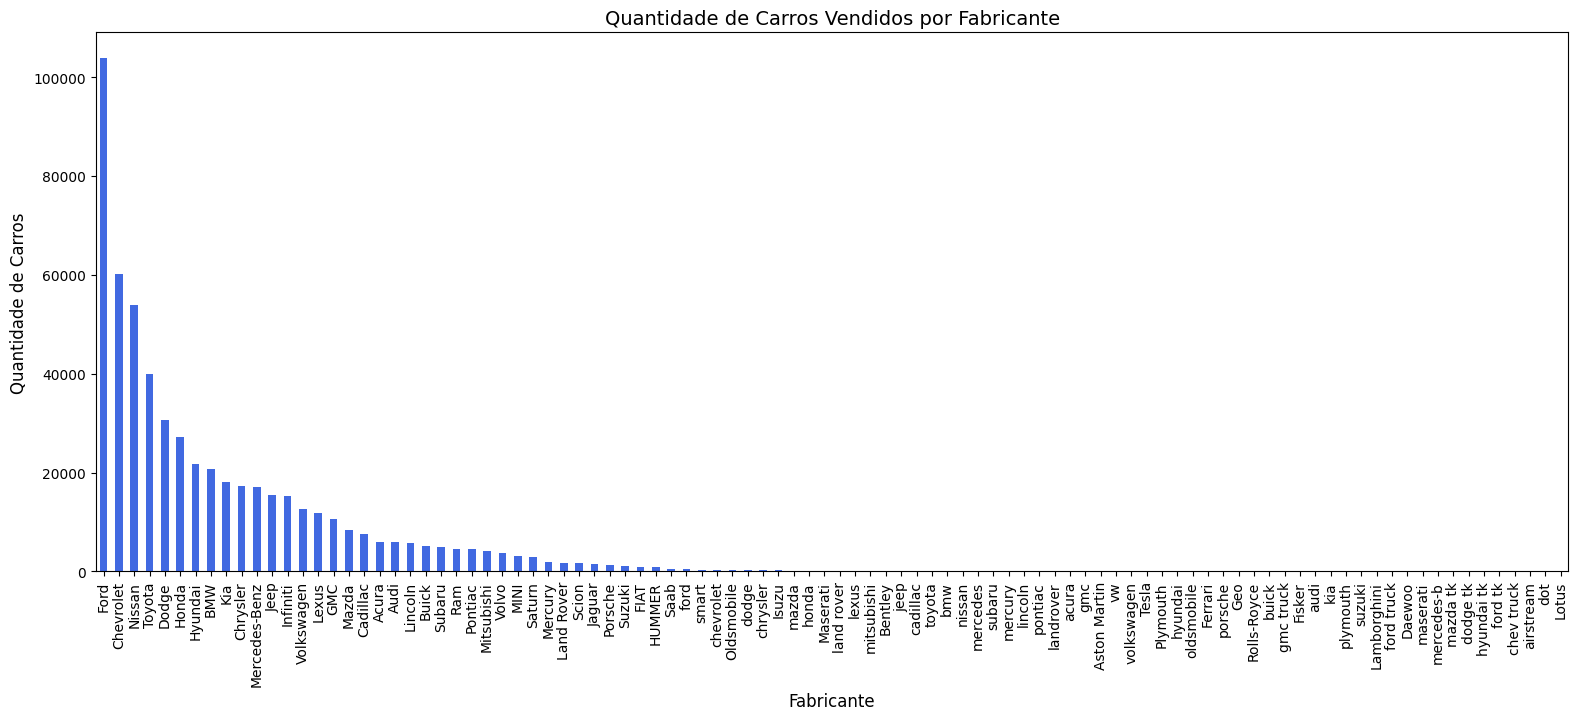

In [ ]:
make_counts = df["make"].value_counts() #grafico para mostra a fabricante e a quantidade de carros feitos respectivamente

plt.figure(figsize=(19, 7))
make_counts.plot(kind="bar", color="royalblue")

plt.title("Quantidade de Carros Vendidos por Fabricante", fontsize=14)
plt.xlabel("Fabricante", fontsize=12)
plt.ylabel("Quantidade de Carros", fontsize=12)
plt.xticks(rotation=90)  

plt.show()

In [ ]:
suv = df[df["body"] == "SUV"] #aqui é uma tabela mostrando todos os SUV da lista 
suv=suv.dropna()
(suv)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,kilometragem KM,year_month
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,CA,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16,26776.633408,2014-12
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,CA,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16,15115.867396,2014-12
13,2015,Kia,Sorento,LX,SUV,automatic,5xyktca66fg561407,CA,5.0,14634.0,silver,black,kia motors america inc,20600.0,21500.0,2014-12-16,23550.048278,2014-12
17,2014,Audi,Q5,2.0T Premium Plus quattro,SUV,automatic,wa1lfafpxea085074,CA,49.0,7983.0,white,black,audi north scottsdale,37100.0,40000.0,2014-12-18,12846.797554,2014-12
28,2014,BMW,X5,sDrive35i,SUV,automatic,5uxkr2c52e0h33130,CA,19.0,11278.0,gray,black,avis rac/san leandro,50400.0,34000.0,2014-12-16,18149.340200,2014-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2012,Jeep,Grand Cherokee,Laredo,SUV,automatic,1c4rjfagxcc128770,TN,37.0,42971.0,silver,black,wholesale inc # 2,21900.0,22000.0,2015-07-07,69151.915031,2015-07
558821,2012,Ford,Escape,XLT,SUV,automatic,1fmcu9d78ckc84074,FL,38.0,74673.0,white,gray,lehman buick gmc llc,11550.0,11400.0,2015-07-06,120168.973286,2015-07
558826,2014,Jeep,Grand Cherokee,Limited,SUV,automatic,1c4rjebg4ec573100,CA,44.0,9024.0,gray,black,enterprise vehicle exchange / tra / rental / t...,29800.0,17300.0,2015-07-09,14522.046991,2015-07
558827,2014,Jeep,Grand Cherokee,Laredo,SUV,automatic,1c4rjfag0ec466276,PA,42.0,25180.0,gray,black,hertz corporation/gdp,26000.0,24500.0,2015-07-06,40521.403283,2015-07


In [ ]:
luxo = df[df["sellingprice"] > 150000] # mostra os carros que foram vendidos por mais de 150mil
luxo=luxo.dropna()
(luxo)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,kilometragem KM,year_month
1102,2012,Ferrari,California,Base,Convertible,automatic,zff65tja5c0187066,CA,42.0,10902.0,gray,brown,chicago motor car corporation,149000.0,154000.0,2014-12-30,17544.254908,2014-12
35867,2012,Ferrari,California,Base,Convertible,automatic,zff65lja1c0183418,FL,45.0,8149.0,silver,red,the collection,156000.0,156000.0,2014-12-18,13113.936273,2014-12
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58cux50727,FL,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,2015-01-13,23038.300612,2015-01
146917,2014,BMW,i8,Base,Coupe,automatic,wby2z2c59evx64214,CA,5.0,60.0,white,brown,ferrari of orange county,176000.0,165000.0,2015-01-14,96.556164,2015-01
194349,2011,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58bux50113,CA,42.0,12912.0,black,black,financial services remarketing (bmw int),166000.0,163000.0,2015-01-28,20778.886386,2015-01
194738,2010,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s56aux48701,CA,4.0,19836.0,black,black,financial services remarketing (bmw int),146000.0,154000.0,2015-01-28,31921.467654,2015-01
239357,2014,BMW,i8,Base,Coupe,automatic,wby2z2c5xevx64349,FL,5.0,530.0,gray,brown,auto plaza motor sports llc,170000.0,159000.0,2015-02-09,852.912778,2015-02
239360,2014,BMW,i8,Base,Coupe,automatic,wby2z2c57evx64633,CA,48.0,124.0,white,black,pacoima motors,172000.0,160000.0,2015-02-12,199.549405,2015-02
283534,2014,BMW,i8,Base,Coupe,automatic,wby2z2c57evx64261,FL,5.0,154.0,white,beige,american bank auto liquidators,170000.0,165000.0,2015-02-09,247.827486,2015-02
299198,2013,Bentley,Continental GTC,V8,Convertible,automatic,scbgt3za7dc084568,FL,44.0,2968.0,black,red,the collection,152000.0,163000.0,2015-02-11,4776.311555,2015-02


In [ ]:
df_filtrado = df[df["sellingprice"] > 150000][["make","sellingprice"]] #codigo para mostras de forma detalhada os carros que foram vendidos por mais de 150mil e sua marca

(df_filtrado)


,make,sellingprice
1102,Ferrari,154000.0
35867,Ferrari,156000.0
125095,Rolls-Royce,169500.0
146917,BMW,165000.0
194349,Rolls-Royce,163000.0
194738,Rolls-Royce,154000.0
239357,BMW,159000.0
239360,BMW,160000.0
283534,BMW,165000.0
299198,Bentley,163000.0


In [ ]:
df["kilometragem KM"] = df["odometer"] / 0.6214 #linha para criar nova coluna chamada Kilometragem KM

df[["kilometragem KM", "odometer", "make"]] 


,kilometragem KM,odometer,make
0,26776.633408,16639.0,Kia
1,15115.867396,9393.0,Kia
2,2141.937560,1331.0,BMW
3,22983.585452,14282.0,Volvo
4,4250.080463,2641.0,BMW
...,...,...,...
558832,29377.212745,18255.0,Kia
558833,87532.990023,54393.0,Ram
558834,81366.269714,50561.0,BMW
558835,26807.209527,16658.0,Nissan


In [ ]:
df["transmission"] = df["transmission"].fillna(df["transmission"].mode()[0]) #linhas para mostrar o ano, marca, modelo e tipo de transmissão

df_sorted = df.sort_values(by="year", ascending=False) # linha para ordenar eles pelo ano do carro
df_sorted=df_sorted.dropna()

df_sorted[["year", "make", "model", "transmission"]]


,year,make,model,transmission
558835,2015,Nissan,Altima,automatic
438507,2015,Chevrolet,Equinox,automatic
5,2015,Nissan,Altima,automatic
438508,2015,Chevrolet,Express Cargo,automatic
0,2015,Kia,Sorento,automatic
...,...,...,...,...
234576,1984,Ford,Altima,automatic
182345,1984,Ford,Altima,automatic
368682,1983,Ford,Altima,automatic
530893,1982,Ford,Altima,automatic


In [ ]:
df.fillna(df.mode().iloc[0], inplace=True) #media geral de preços dos carros de cada marca 

media_precos = df.groupby("make")["sellingprice"].mean()

print(media_precos.to_string())



make
Acura             14017.268260
Aston Martin      54812.000000
Audi              19915.432782
BMW               21441.895748
Bentley           74367.672414
Buick             10721.764245
Cadillac          15221.155872
Chevrolet         11977.397528
Chrysler          11167.230030
Daewoo              400.000000
Dodge             11206.789124
FIAT              10367.487861
Ferrari          127210.526316
Fisker            46461.111111
Ford              13987.498820
GMC               16951.410534
Geo                 528.947368
HUMMER            15269.488199
Honda             10940.432588
Hyundai           11010.629171
Infiniti          20417.457694
Isuzu              1709.196078
Jaguar            19782.518310
Jeep              15000.244145
Kia               11808.583449
Lamborghini      112625.000000
Land Rover        33097.855908
Lexus             20286.236827
Lincoln           16824.676915
Lotus             40800.000000
MINI              12313.663151
Maserati          45320.300752
Maz

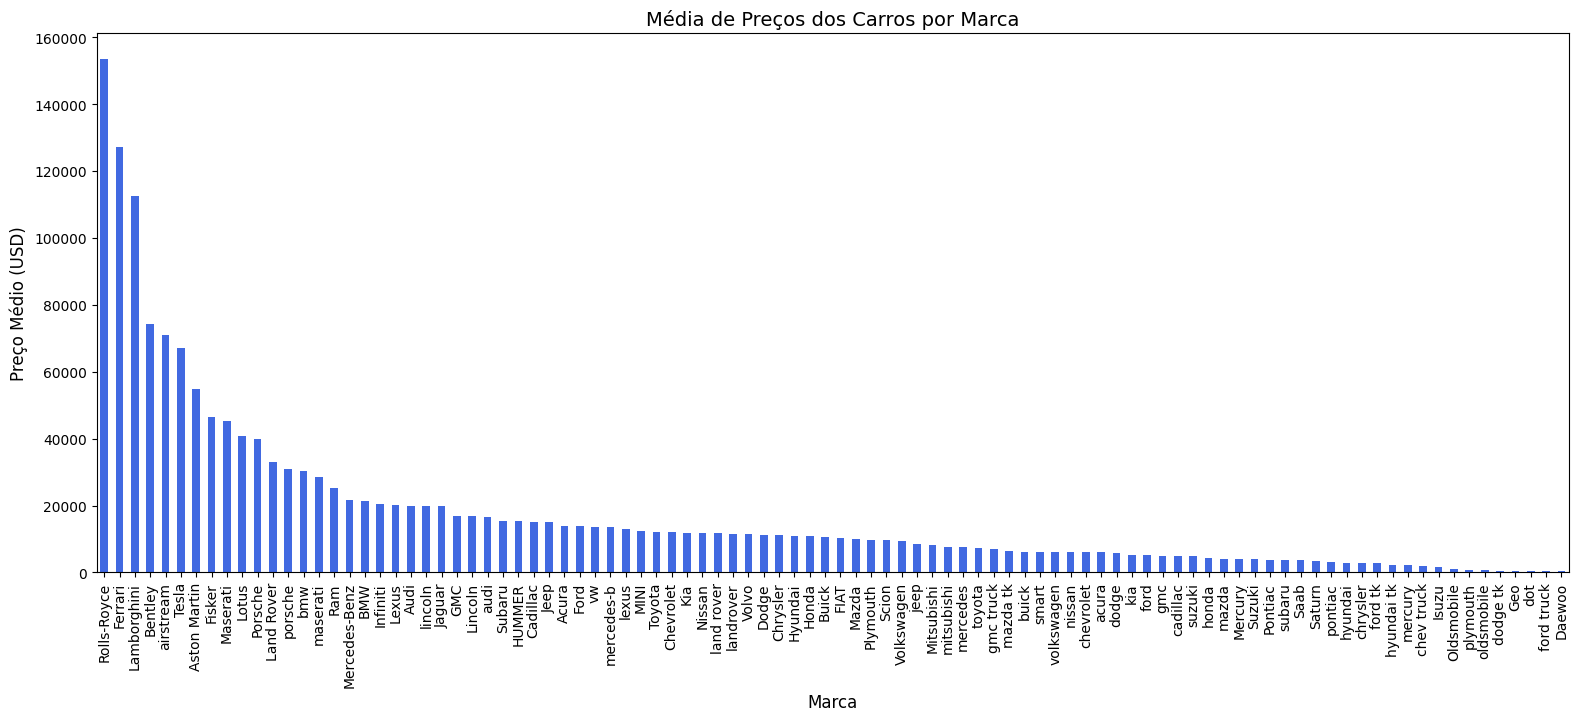

In [ ]:
plt.figure(figsize=(19, 7)) # grafico mostrando a media de preço x marca
media_precos.sort_values(ascending=False).plot(kind="bar", color="royalblue")

# Adicionar título e rótulos
plt.title("Média de Preços dos Carros por Marca", fontsize=14)
plt.xlabel("Marca", fontsize=12)
plt.ylabel("Preço Médio (USD)", fontsize=12)
plt.xticks(rotation=90)  


plt.show()

In [ ]:
media_precos_df = media_precos.reset_index() #exportando para o excel os dados do preço medio por marca
media_precos_df.columns = ["Marca", "Preço Médio"]

media_precos_df.to_excel("media_precos_marcas.xlsx", index=False)

In [ ]:
marcas = df.groupby("make").size() #linhas para mostrar quantos carros foram vendidos por marca

marcas_ordem = marcas.sort_values(ascending=False)

print(marcas_ordem.to_string())

make
Ford             103855
Chevrolet         60197
Nissan            53946
Toyota            39871
Dodge             30710
Honda             27206
Hyundai           21816
BMW               20719
Kia               18077
Chrysler          17276
Mercedes-Benz     17141
Jeep              15372
Infiniti          15305
Volkswagen        12581
Lexus             11861
GMC               10613
Mazda              8362
Cadillac           7519
Acura              5901
Audi               5869
Lincoln            5757
Buick              5107
Subaru             5043
Ram                4574
Pontiac            4497
Mitsubishi         4140
Volvo              3788
MINI               3224
Saturn             2841
Mercury            1992
Land Rover         1735
Scion              1687
Jaguar             1420
Porsche            1383
Suzuki             1073
FIAT                865
HUMMER              805
Saab                484
ford                443
smart               396
chevrolet           390
Oldsmobile 

In [ ]:
df["saledate"] = pd.to_datetime(df["saledate"], errors="coerce") #linhas para procurar a quantidade de carros vendidos por estado e por periodo de data

inicio = pd.Timestamp("2014-01-01")
fim = pd.Timestamp("2015-07-25")

df["state"] = df["state"].str.strip().str.upper()

estado_desejado = "PA" 
df_modific = df[(df["saledate"] >= inicio) & 
                (df["saledate"] < fim) & 
                (df["state"] == estado_desejado)]

tempo_estado = df_modific.groupby("saledate").size()

pd.set_option("display.max_rows", None)

pd.set_option("display.max_columns", None) 

pd.set_option("display.expand_frame_repr", False) 

print(tempo_estado)





saledate
2014-01-02      18
2014-01-06       1
2014-12-17     118
2014-12-18     120
2014-12-19    2288
2014-12-22       2
2014-12-23     650
2014-12-29       9
2014-12-30     226
2015-01-02    1271
2015-01-04      44
2015-01-05       3
2015-01-06      26
2015-01-07     475
2015-01-08     239
2015-01-09    2099
2015-01-12      14
2015-01-13     776
2015-01-14      11
2015-01-15    2902
2015-01-16       3
2015-01-18      56
2015-01-19     302
2015-01-20     380
2015-01-21     347
2015-01-22    3234
2015-01-25      26
2015-01-26     149
2015-01-27     306
2015-01-28      19
2015-01-29    1304
2015-02-01      64
2015-02-02     378
2015-02-03     377
2015-02-04     291
2015-02-05    2861
2015-02-06       1
2015-02-08      32
2015-02-09     436
2015-02-10     531
2015-02-11       2
2015-02-12    2672
2015-02-15      42
2015-02-16     387
2015-02-17     547
2015-02-18     220
2015-02-19     820
2015-02-20    1841
2015-02-22      26
2015-02-23     276
2015-02-24     458
2015-02-25       2
201

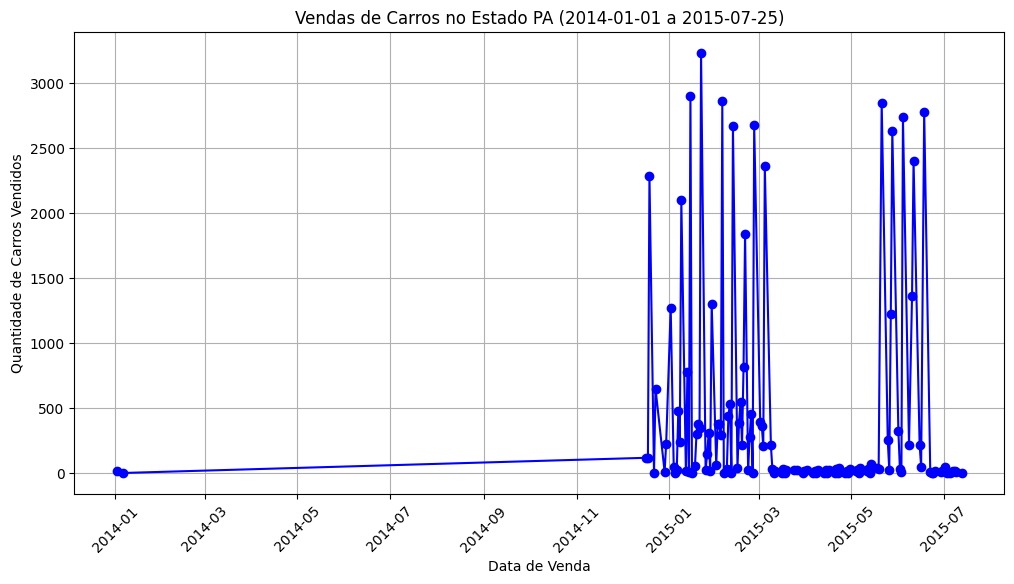

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(tempo_estado.index, tempo_estado.values, marker="o", linestyle="-", color="b")
plt.xlabel("Data de Venda")
plt.ylabel("Quantidade de Carros Vendidos")
plt.title(f"Vendas de Carros no Estado {estado_desejado} ({inicio.date()} a {fim.date()})")
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar o gráfico
plt.show()

In [ ]:
tempo_estado_df = tempo_estado.reset_index(name='Quantidade de Carros Vendidos') #exportando para o excel os dados do venda de carros por mes em estado XX
tempo_estado_df.columns = ["saledate","quantidade ce carros vendidos"]
tempo_estado_df.to_excel("venda de carros do estado XX.xlsx", index=False)

In [ ]:
df["year_month"] = df["saledate"].dt.to_period("M")

vendas_por_mes = df.groupby("year_month").size()
vendas_por_marca = df.groupby(["year_month", "make"]).size()
faturamento_mensal = df.groupby("year_month")["sellingprice"].sum()


vendas_por_mes = df.groupby("year_month").size()

marca_mais_vendida = vendas_por_marca.groupby(level=0).idxmax()
quantidade_mais_vendida = vendas_por_marca.groupby(level=0).max()

resultado = pd.DataFrame({
    "Faturamento Mensal": faturamento_mensal,
    "Vendas Totais": vendas_por_mes,
    "Média de Vendas": media_vendas,
    "Marca Mais Vendida": [m[1] for m in marca_mais_vendida],
    "Quantidade Marca Mais Vendida": quantidade_mais_vendida
})

print(resultado)


            Faturamento Mensal  Vendas Totais  Média de Vendas  \
year_month                                                       
2014-01           3.204525e+06            206          55883.7   
2014-02           1.050000e+04              1          55883.7   
2014-12           6.044342e+08          53520          55883.7   
2015-01           1.868964e+09         140647          55883.7   
2015-02           2.218852e+09         163052          55883.7   
2015-03           6.228744e+08          46342          55883.7   
2015-04           1.459504e+07           1438          55883.7   
2015-05           7.596618e+08          53098          55883.7   
2015-06           1.492472e+09          99276          55883.7   
2015-07           2.143081e+07           1257          55883.7   

           Marca Mais Vendida  Quantidade Marca Mais Vendida  
year_month                                                    
2014-01                  Ford                            110  
2014-02           

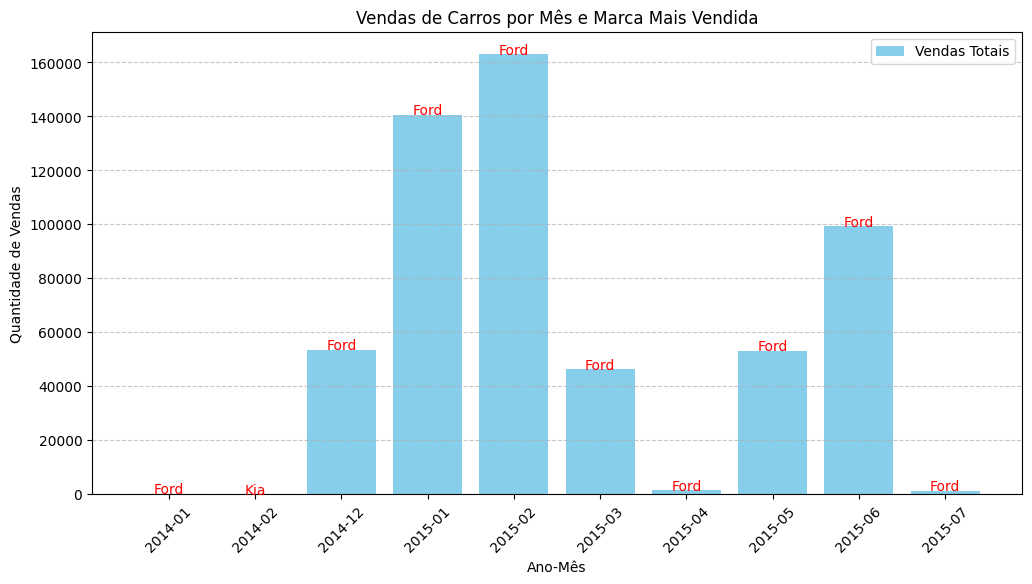

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(resultado.index.astype(str), resultado["Vendas Totais"], color="skyblue", label="Vendas Totais")

for i, txt in enumerate(resultado["Marca Mais Vendida"]):
    ax.text(i, resultado["Vendas Totais"].iloc[i] + 50, txt, ha="center", fontsize=10, color="red")

plt.xticks(rotation=45)
plt.xlabel("Ano-Mês")
plt.ylabel("Quantidade de Vendas")
plt.title("Vendas de Carros por Mês e Marca Mais Vendida")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [ ]:
vendas_por_mes = vendas_por_mes.reset_index()
vendas_por_mes = vendas_por_mes.rename(columns={'index': 'Mes', 'saledate': 'Quantidade de Carros Vendidos'})


In [ ]:
df.to_excel("dados_completos_carros.xlsx", index=False, engine='openpyxl')


In [ ]:

resultado_df = resultado.reset_index() #exportando para o excel os dados do preço medio por marca
resultado_df.columns = ["year_month", "Faturamento Mensal","Vendas Totais","Média de Vendas","Marca Mais Vendida","Quantidade Marca Mais Vendida"]

resultado_df.to_excel("resultado.xlsx", index=False)
